In [15]:
import matplotlib.pyplot as plt
import torchvision
from pathlib import Path
import torch

from torch import nn
from torchvision import transforms
from scripts import data_setup, engine, utils
import torchinfo

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
data_path = Path("data/")
image_path = data_path / "soil_low_med_high"

In [4]:
#HyperParameters
batch_Size = 3
learning_rate = 0.0001
epochS = 20
dropout_prob = 0.5

In [5]:
# Get a set of pretrained model weights
weights = torchvision.models.DenseNet201_Weights.DEFAULT
weights
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [6]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [7]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=batch_Size)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1f40ba7f8f0>,
 ['high', 'low', 'medium'])

In [8]:
model = torchvision.models.densenet201(weights=weights).to(device)

In [9]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
# for param in model.features.parameters():
#     param.requires_grad = False

In [10]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = nn.Sequential(
    nn.Dropout(p=dropout_prob, inplace=True), 
    nn.Linear(in_features=1920, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [11]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=epochS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  5%|▌         | 1/20 [00:23<07:21, 23.24s/it]

Epoch: 1 | train_loss: 1.0365 | train_acc: 0.4524 | test_loss: 0.8022 | test_acc: 0.5833


 10%|█         | 2/20 [00:43<06:30, 21.69s/it]

Epoch: 2 | train_loss: 0.7801 | train_acc: 0.6548 | test_loss: 0.6511 | test_acc: 0.7917


 15%|█▌        | 3/20 [01:05<06:07, 21.62s/it]

Epoch: 3 | train_loss: 0.4943 | train_acc: 0.8333 | test_loss: 0.5547 | test_acc: 0.8333


 20%|██        | 4/20 [01:28<05:55, 22.23s/it]

Epoch: 4 | train_loss: 0.4147 | train_acc: 0.8571 | test_loss: 0.4554 | test_acc: 0.8750


 25%|██▌       | 5/20 [01:51<05:35, 22.40s/it]

Epoch: 5 | train_loss: 0.5164 | train_acc: 0.8095 | test_loss: 0.4178 | test_acc: 0.7917


 30%|███       | 6/20 [02:13<05:11, 22.26s/it]

Epoch: 6 | train_loss: 0.4340 | train_acc: 0.8452 | test_loss: 0.4375 | test_acc: 0.8750


 35%|███▌      | 7/20 [02:35<04:47, 22.14s/it]

Epoch: 7 | train_loss: 0.4701 | train_acc: 0.7976 | test_loss: 0.4098 | test_acc: 0.8750


 40%|████      | 8/20 [02:57<04:27, 22.32s/it]

Epoch: 8 | train_loss: 0.3597 | train_acc: 0.8810 | test_loss: 0.3269 | test_acc: 0.9167


 45%|████▌     | 9/20 [03:20<04:05, 22.28s/it]

Epoch: 9 | train_loss: 0.2759 | train_acc: 0.8929 | test_loss: 0.3853 | test_acc: 0.8333


 50%|█████     | 10/20 [03:41<03:41, 22.12s/it]

Epoch: 10 | train_loss: 0.3924 | train_acc: 0.8214 | test_loss: 0.2767 | test_acc: 0.9167


 55%|█████▌    | 11/20 [04:03<03:17, 21.96s/it]

Epoch: 11 | train_loss: 0.4889 | train_acc: 0.8095 | test_loss: 0.3488 | test_acc: 0.8750


 60%|██████    | 12/20 [04:26<02:58, 22.25s/it]

Epoch: 12 | train_loss: 0.2670 | train_acc: 0.8929 | test_loss: 0.3411 | test_acc: 0.8750


 65%|██████▌   | 13/20 [04:49<02:37, 22.49s/it]

Epoch: 13 | train_loss: 0.3637 | train_acc: 0.8929 | test_loss: 0.3969 | test_acc: 0.7083


 70%|███████   | 14/20 [05:11<02:14, 22.36s/it]

Epoch: 14 | train_loss: 0.2327 | train_acc: 0.9167 | test_loss: 0.3021 | test_acc: 0.8750


 75%|███████▌  | 15/20 [05:33<01:50, 22.16s/it]

Epoch: 15 | train_loss: 0.2432 | train_acc: 0.9405 | test_loss: 0.2067 | test_acc: 0.9167


 80%|████████  | 16/20 [05:54<01:27, 21.90s/it]

Epoch: 16 | train_loss: 0.2206 | train_acc: 0.8929 | test_loss: 0.5091 | test_acc: 0.7917


 85%|████████▌ | 17/20 [06:16<01:05, 21.82s/it]

Epoch: 17 | train_loss: 0.4335 | train_acc: 0.8571 | test_loss: 0.2068 | test_acc: 0.9583


 90%|█████████ | 18/20 [06:37<00:43, 21.77s/it]

Epoch: 18 | train_loss: 0.4064 | train_acc: 0.8452 | test_loss: 0.2842 | test_acc: 0.9167


 95%|█████████▌| 19/20 [06:59<00:21, 21.83s/it]

Epoch: 19 | train_loss: 0.1476 | train_acc: 0.9643 | test_loss: 0.2576 | test_acc: 0.9167


100%|██████████| 20/20 [07:21<00:00, 22.07s/it]

Epoch: 20 | train_loss: 0.4304 | train_acc: 0.8571 | test_loss: 0.2898 | test_acc: 0.9583
[INFO] Total training time: 441.441 seconds


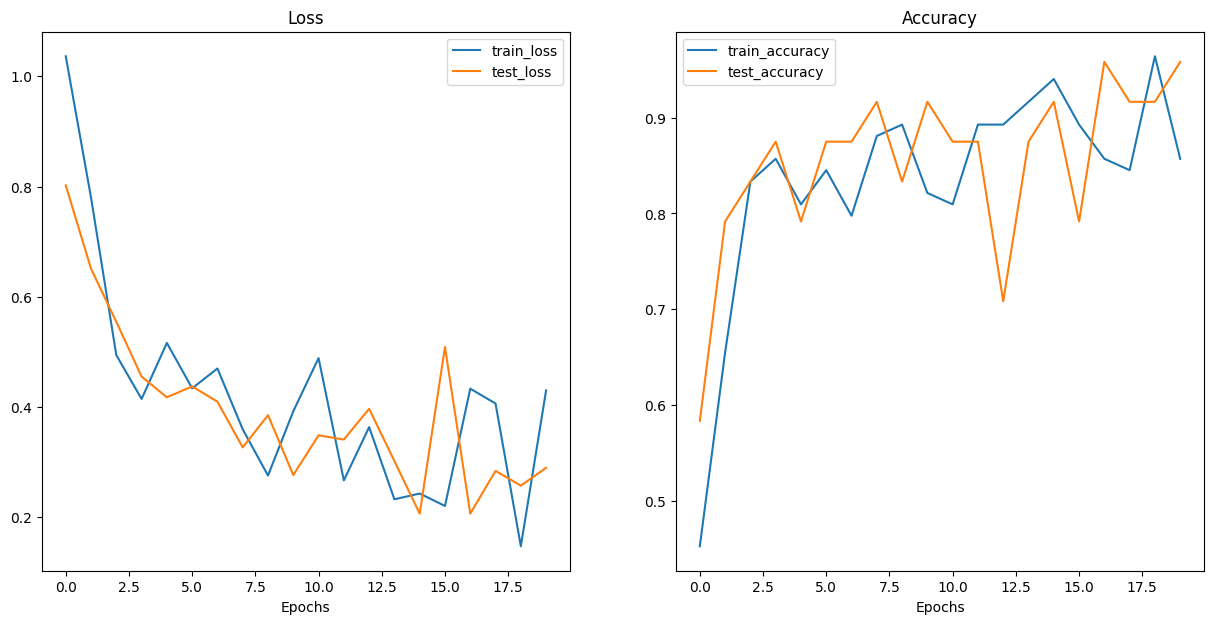

In [13]:
from scripts.helper_functions import plot_loss_curves

plot_loss_curves(results)

In [14]:
from winsound import Beep
Beep(300, 200)

In [16]:
utils.save_model(model=model,
                 target_dir="models",
                 model_name="densenet1.pth")

[INFO] Saving model to: models\densenet1.pth
